In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [41]:
path = '/Users/admin/JHU_Project/Python/Hexin/Behavior/beh/'
filename1 = path + 'HMaze_2024_10_17__12_24_14.beh.txt'
raw_data1 = pd.read_csv(filename1, sep=',')
filename2 = path + 'HMaze_2024_10_18__11_21_40.beh.txt'
raw_data2 = pd.read_csv(filename2, sep=',')
filename3 = path + 'HMaze_2024_10_15__12_10_50.beh.txt'
raw_data3 = pd.read_csv(filename3, sep=',')


In [53]:
path = '/Users/admin/JHU_Project/Python/Hexin/Behavior/beh/'

all_sessions = []

for file_name in os.listdir(path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(path, file_name)
        
        session_date = file_name.split('_')[1] + '_' + file_name.split('_')[2] + '_' + file_name.split('_')[3]
        
        data = pd.read_csv(file_path, delimiter=',') 
        data['session_date'] = session_date
        
        all_sessions.append(data)

all_sessions = pd.concat(all_sessions, ignore_index=True)
all_sessions['session_date'] = pd.to_datetime(all_sessions['session_date'], format='%Y_%m_%d')

all_sessions = all_sessions.sort_values(by='session_date').reset_index(drop=True)

print(all_sessions.head())


   Control  TotalEpisodeNum  EpisodeNum  Goal  Start  EpisodeLength  \
0        0               48           1    10      3              6   
1        0               33           2     5      8              6   
2        0               33           2     5      8              6   
3        0               33           2     5      8              6   
4        0               33           2     5      8              6   

   TotalTrialNum  TrialNum  CurrentState  CorrectState  ...  ForePeriodEntry  \
0            360         3             1             2  ...          2786769   
1            201        37             9             8  ...          2173770   
2            202        38             8            13  ...          2178419   
3            203        39            13            12  ...          2181651   
4            204        40            12            11  ...          2184234   

   DelayperiodEntry  DelayperiodExit  FeedbackPeriodEntry  ITIEntry  \
0           2787302  

<Figure size 1200x600 with 0 Axes>

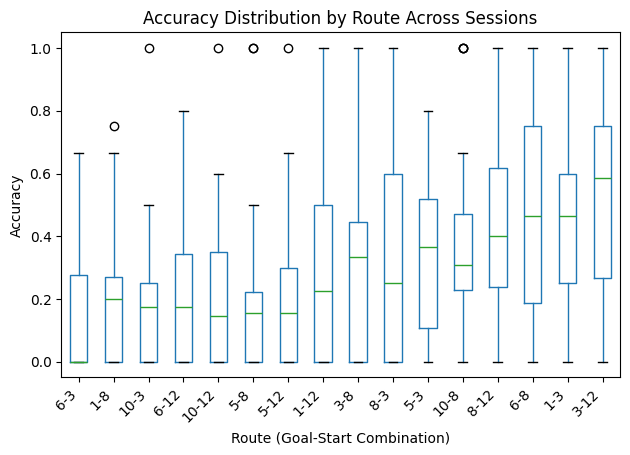

In [ ]:
all_sessions['Route'] = all_sessions['Goal'].astype(str) + '-' + all_sessions['Start'].astype(str)

session_accuracy = []

for session_date, session_data in all_sessions.groupby('session_date'):
    session_routes = session_data['Route'].unique()
    
    for route in session_routes:
        route_data = session_data[session_data['Route'] == route]
        total_trials = route_data['TrialNum'].nunique()  
        successful_trials = 0
        
        episodes = route_data['TotalEpisodeNum'].unique()
        for episode in episodes:
            episode_data = route_data[route_data['TotalEpisodeNum'] == episode]
            is_successful = True
            
            for i in range(len(episode_data) - 1):
                # CorrectState this trial and next trial
                if episode_data.iloc[i + 1]['CurrentState'] != episode_data.iloc[i]['CorrectState']:
                    is_successful = False
                    break
            
            if is_successful:
                successful_trials += 1
        
        accuracy = successful_trials / len(episodes) if len(episodes) > 0 else 0
        session_accuracy.append({'session_date': session_date, 'Route': route, 'Accuracy': accuracy})

session_accuracy_df = pd.DataFrame(session_accuracy)

mean_accuracy = session_accuracy_df.groupby('Route')['Accuracy'].mean().sort_values()

session_accuracy_df['Route'] = pd.Categorical(session_accuracy_df['Route'], categories=mean_accuracy.index, ordered=True)

# boxplot
plt.figure(figsize=(12, 6))
session_accuracy_df.boxplot(column='Accuracy', by='Route', grid=False)
plt.title('Accuracy Distribution by Route Across Sessions')
plt.suptitle('') 
plt.xlabel('Route (Goal-Start Combination)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

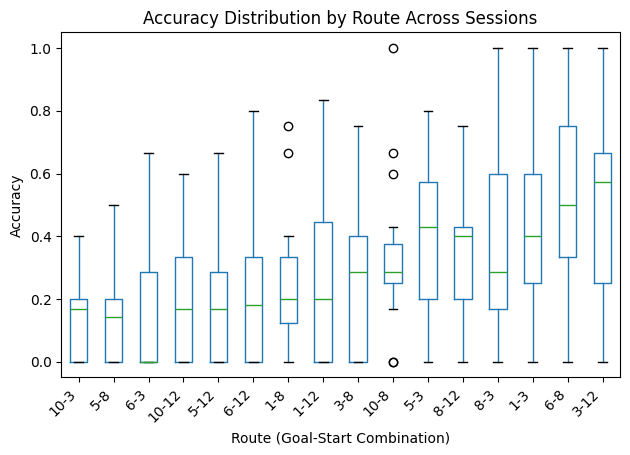

In [ ]:
all_sessions['Route'] = all_sessions['Goal'].astype(str) + '-' + all_sessions['Start'].astype(str)

session_trial_counts = all_sessions.groupby('session_date')['TotalTrialNum'].nunique()
valid_sessions = session_trial_counts[session_trial_counts >= 300].index
filtered_sessions = all_sessions[all_sessions['session_date'].isin(valid_sessions)]


session_accuracy = []

for session_date, session_data in filtered_sessions.groupby('session_date'):
    session_routes = session_data['Route'].unique()
    
    for route in session_routes:
        route_data = session_data[session_data['Route'] == route]
        successful_trials = 0
        
        episodes = route_data['TotalEpisodeNum'].unique()
        for episode in episodes:
            episode_data = route_data[route_data['TotalEpisodeNum'] == episode]
            is_successful = True
            
            for i in range(len(episode_data) - 1):
                # CorrectState this trial and next trial
                if episode_data.iloc[i + 1]['CurrentState'] != episode_data.iloc[i]['CorrectState']:
                    is_successful = False
                    break
            
            if is_successful:
                successful_trials += 1
        
        accuracy = successful_trials / len(episodes) if len(episodes) > 0 else 0
        session_accuracy.append({'session_date': session_date, 'Route': route, 'Accuracy': accuracy})

session_accuracy_df = pd.DataFrame(session_accuracy)

mean_accuracy = session_accuracy_df.groupby('Route')['Accuracy'].mean().sort_values()

session_accuracy_df['Route'] = pd.Categorical(session_accuracy_df['Route'], categories=mean_accuracy.index, ordered=True)

# boxplot
plt.figure(figsize=(12, 6))
session_accuracy_df.boxplot(column='Accuracy', by='Route', grid=False)
plt.title('Accuracy Distribution by Route Across Sessions')
plt.suptitle('')  
plt.xlabel('Route (Goal-Start Combination)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

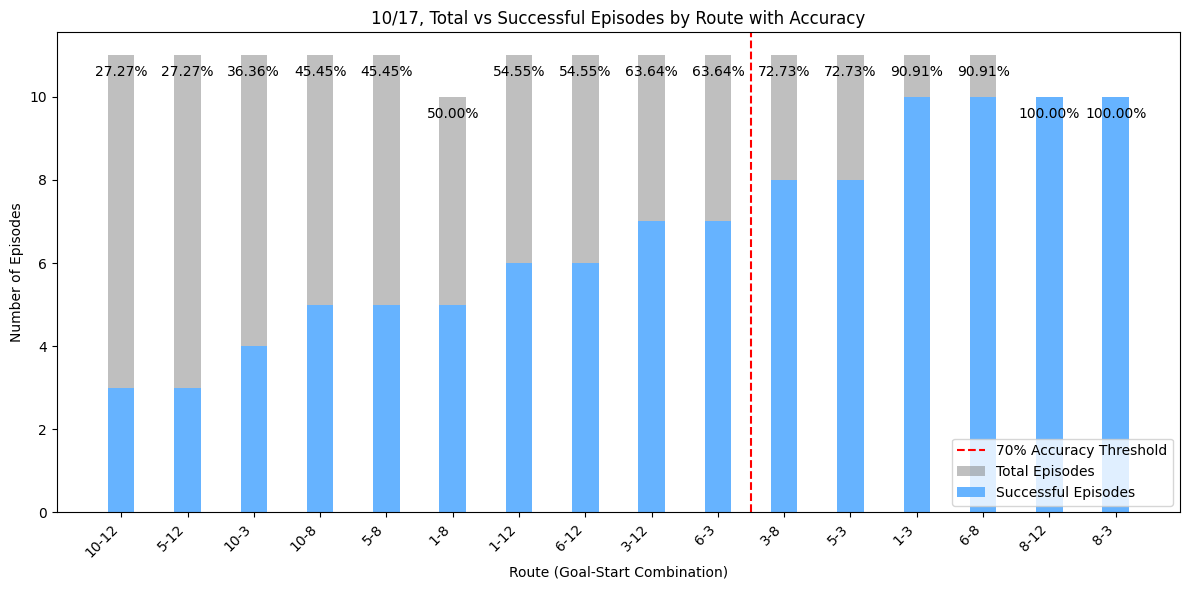

In [ ]:
raw_data1['Route'] = raw_data1['Goal'].astype(str) + '-' + raw_data1['Start'].astype(str)

episode_data = raw_data1[['Route', 'TotalEpisodeNum', 'TrialNum', 'CurrentState', 'CorrectState']].to_numpy()

# unique goal-start comb and episode num
routes = np.unique(episode_data[:, 0])
total_episodes_per_route = {route: 0 for route in routes}
successful_episodes_per_route = {route: 0 for route in routes}

for route in routes:
    route_data = episode_data[episode_data[:, 0] == route]
    
    episode_nums = np.unique(route_data[:, 1])
    for episode in episode_nums:
        episode_trials = route_data[route_data[:, 1] == episode]
        
        is_successful = True
        for i in range(len(episode_trials) - 1):
            if episode_trials[i + 1][3] != episode_trials[i][4]:  # [3] CurrentState, [4] CorrectState
                is_successful = False
                break
        
        total_episodes_per_route[route] += 1
        if is_successful:
            successful_episodes_per_route[route] += 1

route_stats = pd.DataFrame({
    'Route': routes,
    'TotalEpisodes': [total_episodes_per_route[route] for route in routes],
    'SuccessfulEpisodes': [successful_episodes_per_route[route] for route in routes]
})

route_stats['Accuracy'] = route_stats['SuccessfulEpisodes'] / route_stats['TotalEpisodes']
route_stats = route_stats.sort_values('Accuracy').reset_index(drop=True)

# acc should > 70%
split_index = route_stats[route_stats['Accuracy'] >= 0.7].index[0]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(12, 6))
bar_width = 0.4
routes = route_stats['Route']

plt.bar(routes, route_stats['TotalEpisodes'], color='grey', alpha=0.5, width=bar_width, label='Total Episodes')
plt.bar(routes, route_stats['SuccessfulEpisodes'], color=colors[1], width=bar_width, label='Successful Episodes')

for i, (total, success, accuracy) in enumerate(zip(route_stats['TotalEpisodes'], route_stats['SuccessfulEpisodes'], route_stats['Accuracy'])):
    plt.text(i, total - 0.5, f'{accuracy:.2%}', ha='center')

plt.axvline(x=split_index - 0.5, color='red', linestyle='--', label='70% Accuracy Threshold')
plt.xlabel('Route (Goal-Start Combination)')
plt.ylabel('Number of Episodes')
plt.title('10/17, Total vs Successful Episodes by Route with Accuracy')
plt.legend(loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



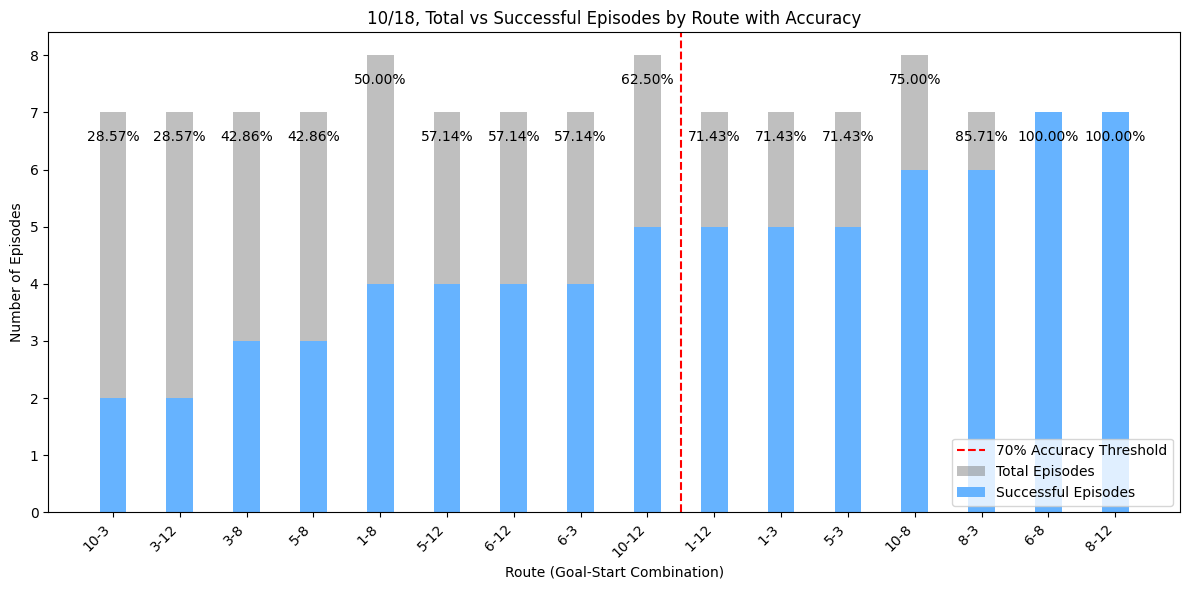

In [ ]:
raw_data2['Route'] = raw_data2['Goal'].astype(str) + '-' + raw_data2['Start'].astype(str)

episode_data = raw_data2[['Route', 'TotalEpisodeNum', 'TrialNum', 'CurrentState', 'CorrectState']].to_numpy()

# unique goal-start comb and episode num
routes = np.unique(episode_data[:, 0])
total_episodes_per_route = {route: 0 for route in routes}
successful_episodes_per_route = {route: 0 for route in routes}

for route in routes:
    route_data = episode_data[episode_data[:, 0] == route]
    
    episode_nums = np.unique(route_data[:, 1])
    for episode in episode_nums:
        episode_trials = route_data[route_data[:, 1] == episode]
        
        is_successful = True
        for i in range(len(episode_trials) - 1):
            if episode_trials[i + 1][3] != episode_trials[i][4]:  # [3] CurrentState, [4] CorrectState
                is_successful = False
                break
        
        total_episodes_per_route[route] += 1
        if is_successful:
            successful_episodes_per_route[route] += 1

route_stats = pd.DataFrame({
    'Route': routes,
    'TotalEpisodes': [total_episodes_per_route[route] for route in routes],
    'SuccessfulEpisodes': [successful_episodes_per_route[route] for route in routes]
})

route_stats['Accuracy'] = route_stats['SuccessfulEpisodes'] / route_stats['TotalEpisodes']
route_stats = route_stats.sort_values('Accuracy').reset_index(drop=True)

# acc should > 70%
split_index = route_stats[route_stats['Accuracy'] >= 0.7].index[0]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(12, 6))
bar_width = 0.4
routes = route_stats['Route']

plt.bar(routes, route_stats['TotalEpisodes'], color='grey', alpha=0.5, width=bar_width, label='Total Episodes')
plt.bar(routes, route_stats['SuccessfulEpisodes'], color=colors[1], width=bar_width, label='Successful Episodes')

for i, (total, success, accuracy) in enumerate(zip(route_stats['TotalEpisodes'], route_stats['SuccessfulEpisodes'], route_stats['Accuracy'])):
    plt.text(i, total - 0.5, f'{accuracy:.2%}', ha='center')
plt.axvline(x=split_index - 0.5, color='red', linestyle='--', label='70% Accuracy Threshold')
plt.xlabel('Route (Goal-Start Combination)')
plt.ylabel('Number of Episodes')
plt.title('10/18, Total vs Successful Episodes by Route with Accuracy')
plt.legend(loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

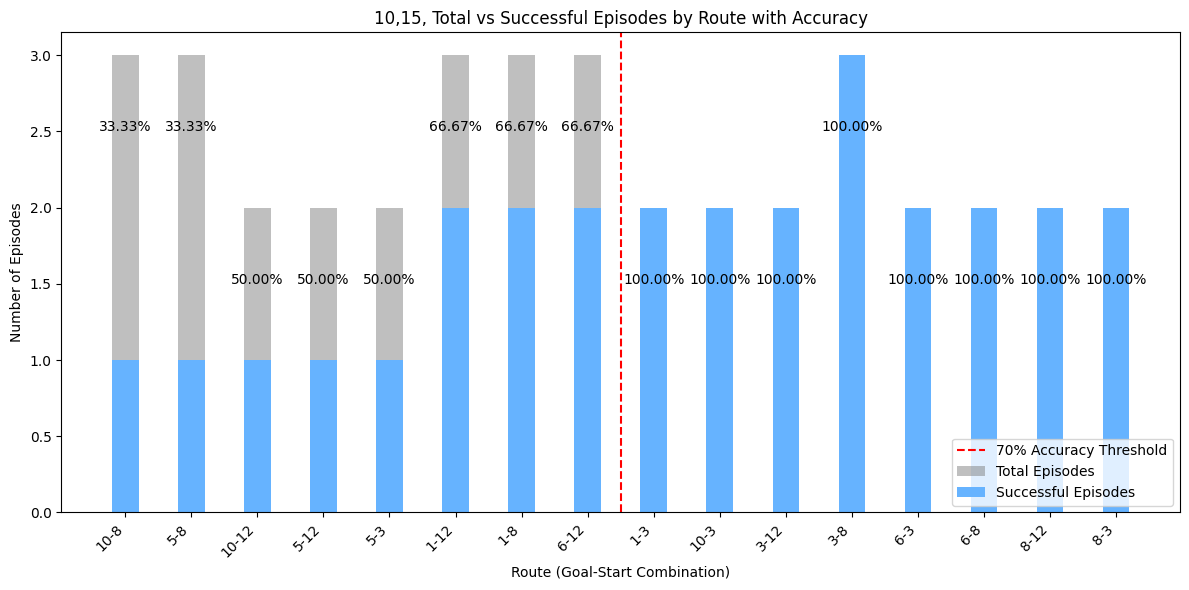

In [ ]:
raw_data3['Route'] = raw_data3['Goal'].astype(str) + '-' + raw_data3['Start'].astype(str)

episode_data = raw_data3[['Route', 'TotalEpisodeNum', 'TrialNum', 'CurrentState', 'CorrectState']].to_numpy()

# unique goal-start comb and episode num
routes = np.unique(episode_data[:, 0])
total_episodes_per_route = {route: 0 for route in routes}
successful_episodes_per_route = {route: 0 for route in routes}

for route in routes:
    route_data = episode_data[episode_data[:, 0] == route]
    
    episode_nums = np.unique(route_data[:, 1])
    for episode in episode_nums:
        episode_trials = route_data[route_data[:, 1] == episode]
        
        is_successful = True
        for i in range(len(episode_trials) - 1):
            if episode_trials[i + 1][3] != episode_trials[i][4]:  # [3] CurrentState, [4] CorrectState
                is_successful = False
                break
        
        total_episodes_per_route[route] += 1
        if is_successful:
            successful_episodes_per_route[route] += 1

route_stats = pd.DataFrame({
    'Route': routes,
    'TotalEpisodes': [total_episodes_per_route[route] for route in routes],
    'SuccessfulEpisodes': [successful_episodes_per_route[route] for route in routes]
})

route_stats['Accuracy'] = route_stats['SuccessfulEpisodes'] / route_stats['TotalEpisodes']
route_stats = route_stats.sort_values('Accuracy').reset_index(drop=True)

split_index = route_stats[route_stats['Accuracy'] >= 0.7].index[0]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(12, 6))
bar_width = 0.4
routes = route_stats['Route']

plt.bar(routes, route_stats['TotalEpisodes'], color='grey', alpha=0.5, width=bar_width, label='Total Episodes')
plt.bar(routes, route_stats['SuccessfulEpisodes'], color=colors[1], width=bar_width, label='Successful Episodes')

for i, (total, success, accuracy) in enumerate(zip(route_stats['TotalEpisodes'], route_stats['SuccessfulEpisodes'], route_stats['Accuracy'])):
    plt.text(i, total - 0.5, f'{accuracy:.2%}', ha='center')
plt.axvline(x=split_index - 0.5, color='red', linestyle='--', label='70% Accuracy Threshold')
plt.xlabel('Route (Goal-Start Combination)')
plt.ylabel('Number of Episodes')
plt.title('10,15, Total vs Successful Episodes by Route with Accuracy')
plt.legend(loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

8-3 & 8-12 are better than 3-8 & 3-12
    but always due to the 3 targets choice trial

compare 3-10 with 8-10: compare time in 8
compare 3-10 with 3-8: compare time in 3
time: ForePeriodEntry to FeedbackPeriodentry
Condition: specific route, TotalTrialNum >= 300, if mistakes in episodes, take the first choice trial 
Figure: average time, with significance test

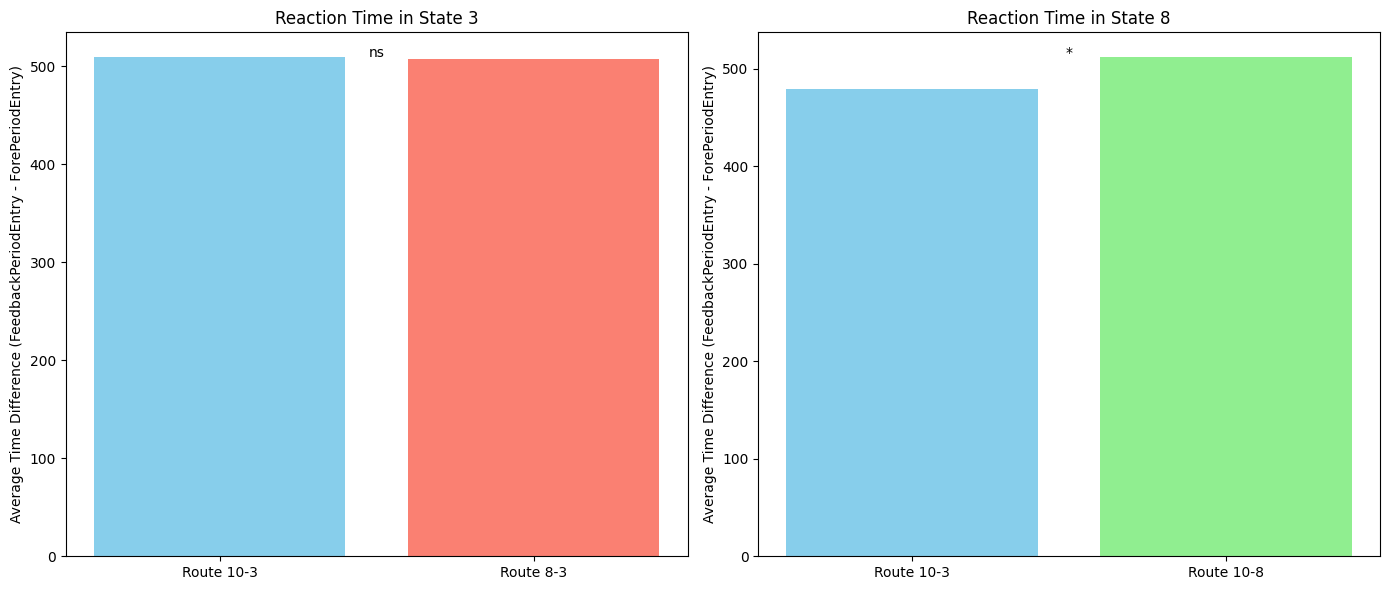

In [ ]:
from scipy.stats import ttest_ind

# route10-3  route8-3 as group 1, route10-3  route10-8 as group 2
group1 = filtered_sessions[filtered_sessions['Route'].isin(['10-3', '8-3'])]
group2 = filtered_sessions[filtered_sessions['Route'].isin(['10-3', '10-8'])]

def calculate_time_diff(data, target_state):
    time_diffs = {'10-3': [], '8-3': [], '10-8': []}
    
    for (route, episode), episode_data in data.groupby(['Route', 'TotalEpisodeNum']):
        target_trials = episode_data[(episode_data['CurrentState'] == target_state)]
        
        if any(episode_data['Choice'] == 0):
            target_trials = target_trials.iloc[:1]  
        
        for _, trial in target_trials.iterrows():
            fore_entry = trial['DelayperiodExit']
            feedback_entry = trial['FeedbackPeriodEntry']
            
            if feedback_entry > fore_entry:
                time_diff = feedback_entry - fore_entry
                time_diffs[route].append(time_diff)
    
    return time_diffs

# CurrentState = 3
time_diffs_group1 = calculate_time_diff(group1, target_state=3)
# CurrentState = 8
time_diffs_group2 = calculate_time_diff(group2, target_state=8)

# t test
t_stat_group1, p_val_group1 = ttest_ind(time_diffs_group1['10-3'], time_diffs_group1['8-3'], equal_var=False)
t_stat_group2, p_val_group2 = ttest_ind(time_diffs_group2['10-3'], time_diffs_group2['10-8'], equal_var=False)

def significance_marker(p_val):
    if p_val < 0.001:
        return '****'
    elif p_val < 0.005:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(['Route 10-3', 'Route 8-3'], [np.mean(time_diffs_group1['10-3']), np.mean(time_diffs_group1['8-3'])], color=['skyblue', 'salmon'])
axes[0].set_title('Reaction Time in State 3')
axes[0].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[0].text(0.5, max(np.mean(time_diffs_group1['10-3']), np.mean(time_diffs_group1['8-3'])) + 0.1, significance_marker(p_val_group1), ha='center')

axes[1].bar(['Route 10-3', 'Route 10-8'], [np.mean(time_diffs_group2['10-3']), np.mean(time_diffs_group2['10-8'])], color=['skyblue', 'lightgreen'])
axes[1].set_title('Reaction Time in State 8')
axes[1].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[1].text(0.5, max(np.mean(time_diffs_group2['10-3']), np.mean(time_diffs_group2['10-8'])) + 0.1, significance_marker(p_val_group2), ha='center')

plt.tight_layout()
plt.show()

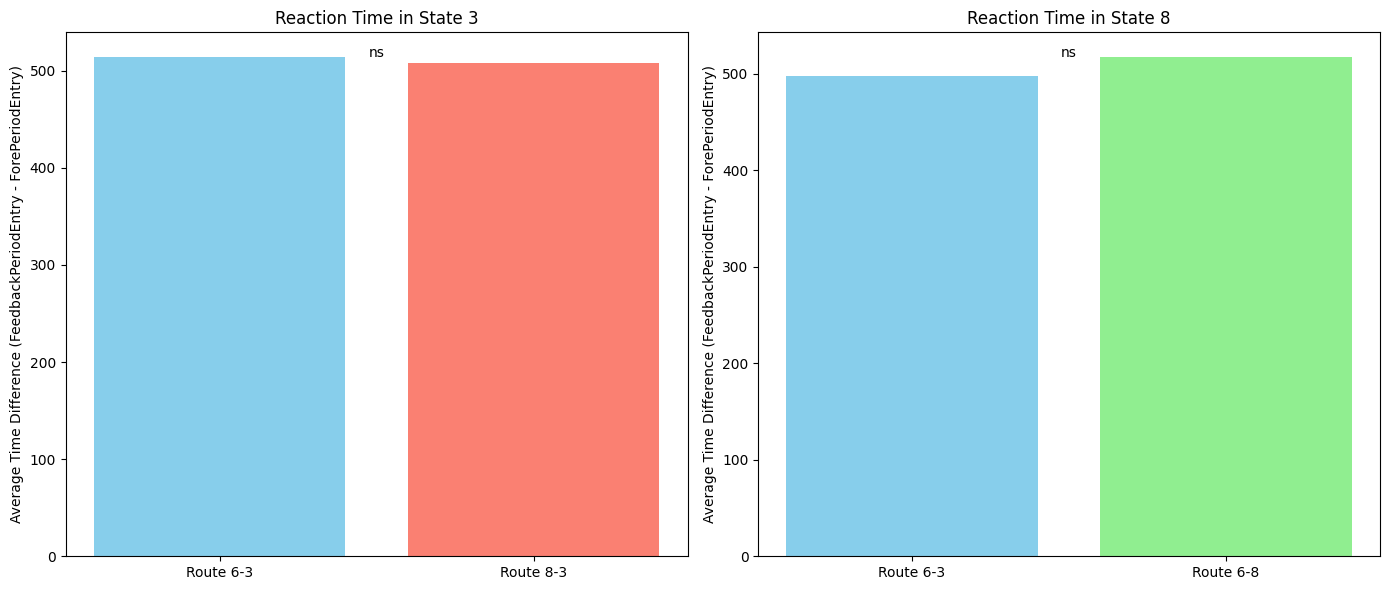

In [ ]:
from scipy.stats import ttest_ind

# route10-3  route8-3 as group 1, route10-3  route10-8 as group 2
group1 = filtered_sessions[filtered_sessions['Route'].isin(['6-3', '8-3'])]
group2 = filtered_sessions[filtered_sessions['Route'].isin(['6-3', '6-8'])]

def calculate_time_diff(data, target_state):
    time_diffs = {'6-3': [], '8-3': [], '6-8': []}
    
    for (route, episode), episode_data in data.groupby(['Route', 'TotalEpisodeNum']):
        target_trials = episode_data[(episode_data['CurrentState'] == target_state)]
        
        if any(episode_data['Choice'] == 0):
            target_trials = target_trials.iloc[:1]  

        for _, trial in target_trials.iterrows():
            fore_entry = trial['DelayperiodExit']
            feedback_entry = trial['FeedbackPeriodEntry']
            
            if feedback_entry > fore_entry:
                time_diff = feedback_entry - fore_entry
                time_diffs[route].append(time_diff)
    
    return time_diffs

# CurrentState = 3
time_diffs_group1 = calculate_time_diff(group1, target_state=3)
# CurrentState = 8
time_diffs_group2 = calculate_time_diff(group2, target_state=8)

# t test
t_stat_group1, p_val_group1 = ttest_ind(time_diffs_group1['6-3'], time_diffs_group1['8-3'], equal_var=False)
t_stat_group2, p_val_group2 = ttest_ind(time_diffs_group2['6-3'], time_diffs_group2['6-8'], equal_var=False)

def significance_marker(p_val):
    if p_val < 0.001:
        return '****'
    elif p_val < 0.005:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(['Route 6-3', 'Route 8-3'], [np.mean(time_diffs_group1['6-3']), np.mean(time_diffs_group1['8-3'])], color=['skyblue', 'salmon'])
axes[0].set_title('Reaction Time in State 3')
axes[0].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[0].text(0.5, max(np.mean(time_diffs_group1['6-3']), np.mean(time_diffs_group1['8-3'])) + 0.1, significance_marker(p_val_group1), ha='center')

axes[1].bar(['Route 6-3', 'Route 6-8'], [np.mean(time_diffs_group2['6-3']), np.mean(time_diffs_group2['6-8'])], color=['skyblue', 'lightgreen'])
axes[1].set_title('Reaction Time in State 8')
axes[1].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[1].text(0.5, max(np.mean(time_diffs_group2['6-3']), np.mean(time_diffs_group2['6-8'])) + 0.1, significance_marker(p_val_group2), ha='center')

plt.tight_layout()
plt.show()

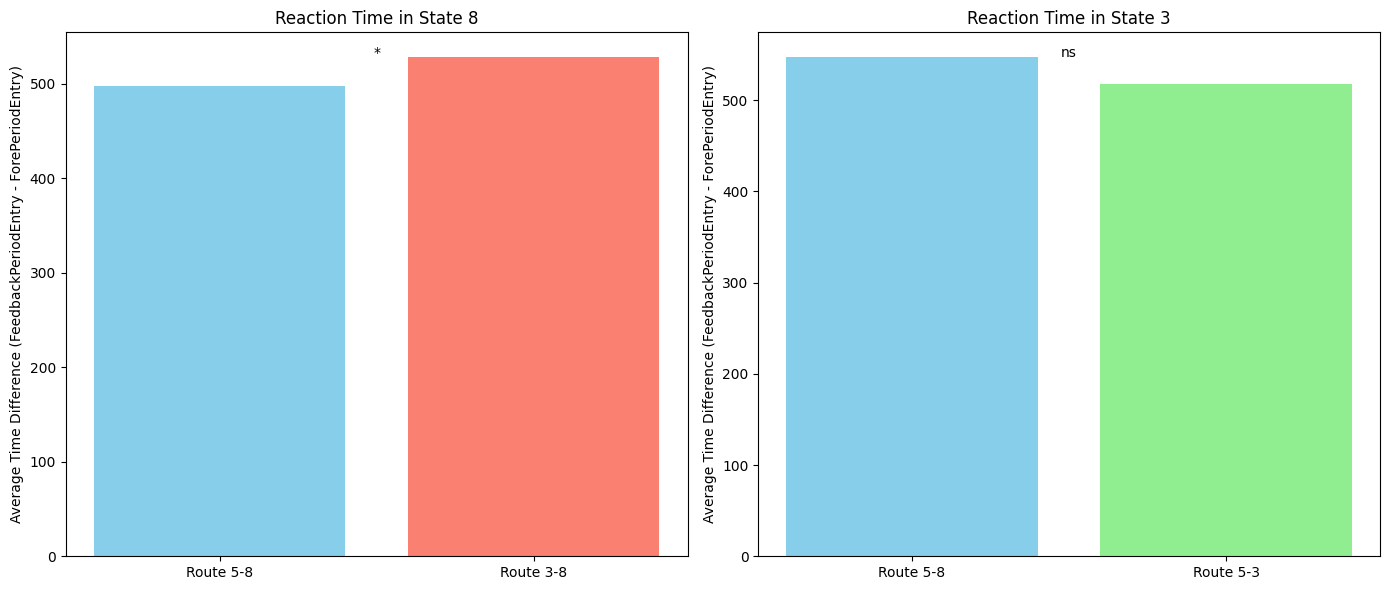

In [ ]:
from scipy.stats import ttest_ind

# # route10-3  route8-3 as group 1, route10-3  route10-8 as group 2
group1 = filtered_sessions[filtered_sessions['Route'].isin(['5-8', '3-8'])]
group2 = filtered_sessions[filtered_sessions['Route'].isin(['5-8', '5-3'])]

def calculate_time_diff(data, target_state):
    time_diffs = {'5-8': [], '3-8': [], '5-3': []}
    
    for (route, episode), episode_data in data.groupby(['Route', 'TotalEpisodeNum']):
        target_trials = episode_data[(episode_data['CurrentState'] == target_state)]
        
        if any(episode_data['Choice'] == 0):
            target_trials = target_trials.iloc[:1] 

        for _, trial in target_trials.iterrows():
            fore_entry = trial['DelayperiodExit']
            feedback_entry = trial['FeedbackPeriodEntry']
            
            if feedback_entry > fore_entry:
                time_diff = feedback_entry - fore_entry
                time_diffs[route].append(time_diff)
    
    return time_diffs

# CurrentState = 3
time_diffs_group1 = calculate_time_diff(group1, target_state=8)
# CurrentState = 8
time_diffs_group2 = calculate_time_diff(group2, target_state=3)

# t test
t_stat_group1, p_val_group1 = ttest_ind(time_diffs_group1['5-8'], time_diffs_group1['3-8'], equal_var=False)
t_stat_group2, p_val_group2 = ttest_ind(time_diffs_group2['5-8'], time_diffs_group2['5-3'], equal_var=False)

def significance_marker(p_val):
    if p_val < 0.001:
        return '****'
    elif p_val < 0.005:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(['Route 5-8', 'Route 3-8'], [np.mean(time_diffs_group1['5-8']), np.mean(time_diffs_group1['3-8'])], color=['skyblue', 'salmon'])
axes[0].set_title('Reaction Time in State 8')
axes[0].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[0].text(0.5, max(np.mean(time_diffs_group1['5-8']), np.mean(time_diffs_group1['3-8'])) + 0.1, significance_marker(p_val_group1), ha='center')

axes[1].bar(['Route 5-8', 'Route 5-3'], [np.mean(time_diffs_group2['5-8']), np.mean(time_diffs_group2['5-3'])], color=['skyblue', 'lightgreen'])
axes[1].set_title('Reaction Time in State 3')
axes[1].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[1].text(0.5, max(np.mean(time_diffs_group2['5-8']), np.mean(time_diffs_group2['5-3'])) + 0.1, significance_marker(p_val_group2), ha='center')

plt.tight_layout()
plt.show()

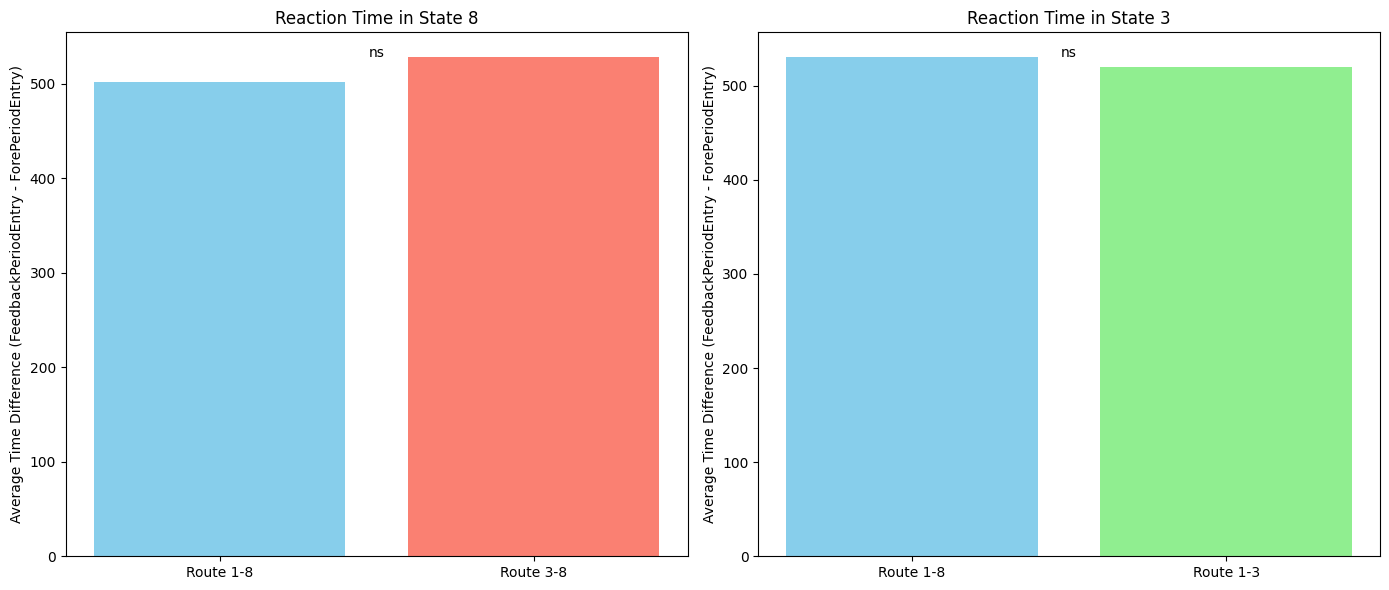

In [ ]:
from scipy.stats import ttest_ind

# route10-3  route8-3 as group 1, route10-3  route10-8 as group 2
group1 = filtered_sessions[filtered_sessions['Route'].isin(['1-8', '3-8'])]
group2 = filtered_sessions[filtered_sessions['Route'].isin(['1-8', '1-3'])]

def calculate_time_diff(data, target_state):
    time_diffs = {'1-8': [], '3-8': [], '1-3': []}
    
    for (route, episode), episode_data in data.groupby(['Route', 'TotalEpisodeNum']):
        target_trials = episode_data[(episode_data['CurrentState'] == target_state)]
        
        if any(episode_data['Choice'] == 0):
            target_trials = target_trials.iloc[:1]  
        
        for _, trial in target_trials.iterrows():
            fore_entry = trial['DelayperiodExit']
            feedback_entry = trial['FeedbackPeriodEntry']

            if feedback_entry > fore_entry:
                time_diff = feedback_entry - fore_entry
                time_diffs[route].append(time_diff)
    
    return time_diffs

# CurrentState = 3
time_diffs_group1 = calculate_time_diff(group1, target_state=8)
# CurrentState = 8
time_diffs_group2 = calculate_time_diff(group2, target_state=3)

t_stat_group1, p_val_group1 = ttest_ind(time_diffs_group1['1-8'], time_diffs_group1['3-8'], equal_var=False)
t_stat_group2, p_val_group2 = ttest_ind(time_diffs_group2['1-8'], time_diffs_group2['1-3'], equal_var=False)

def significance_marker(p_val):
    if p_val < 0.001:
        return '****'
    elif p_val < 0.005:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(['Route 1-8', 'Route 3-8'], [np.mean(time_diffs_group1['1-8']), np.mean(time_diffs_group1['3-8'])], color=['skyblue', 'salmon'])
axes[0].set_title('Reaction Time in State 8')
axes[0].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[0].text(0.5, max(np.mean(time_diffs_group1['1-8']), np.mean(time_diffs_group1['3-8'])) + 0.1, significance_marker(p_val_group1), ha='center')

axes[1].bar(['Route 1-8', 'Route 1-3'], [np.mean(time_diffs_group2['1-8']), np.mean(time_diffs_group2['1-3'])], color=['skyblue', 'lightgreen'])
axes[1].set_title('Reaction Time in State 3')
axes[1].set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
axes[1].text(0.5, max(np.mean(time_diffs_group2['1-8']), np.mean(time_diffs_group2['1-3'])) + 0.1, significance_marker(p_val_group2), ha='center')

plt.tight_layout()
plt.show()

significant difference of the reaction time in state 8
    might due to 2 choice and 3 choices

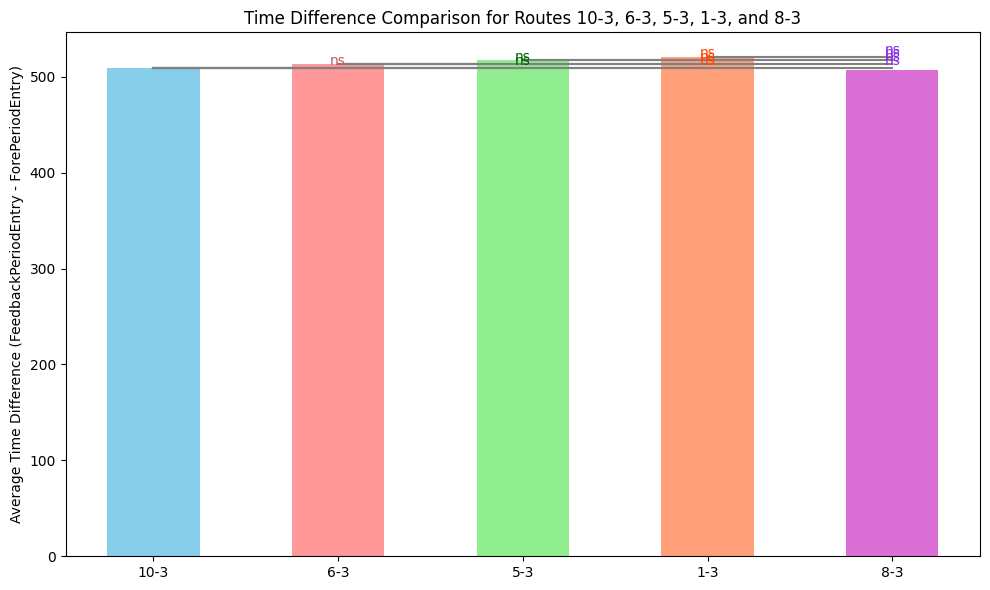

In [ ]:
group = filtered_sessions[filtered_sessions['Route'].isin(['10-3', '6-3', '5-3', '1-3', '8-3'])]

def calculate_time_diff(data, target_state):
    time_diffs = {'10-3': [], '6-3': [], '5-3': [], '1-3': [], '8-3': []}
    for (route, episode), episode_data in data.groupby(['Route', 'TotalEpisodeNum']):
        target_trials = episode_data[(episode_data['CurrentState'] == target_state)]
        if any(episode_data['Choice'] == 0):
            target_trials = target_trials.iloc[:1]
        for _, trial in target_trials.iterrows():
            fore_entry = trial['DelayperiodExit']
            feedback_entry = trial['FeedbackPeriodEntry']
            if feedback_entry > fore_entry:
                time_diff = feedback_entry - fore_entry
                time_diffs[route].append(time_diff)
    return time_diffs

time_diffs_group = calculate_time_diff(group, target_state=3)

p_values = {}
routes = ['10-3', '6-3', '5-3', '1-3', '8-3']

route_colors = ['#87CEEB', '#FF9999', '#90EE90', '#FFA07A', '#DA70D6']  # 浅色柱体
deep_colors = ['#4682B4', '#CD5C5C', '#006400', '#FF4500', '#8A2BE2']  # 深色符号

for i in range(len(routes)):
    for j in range(i + 1, len(routes)):
        route1, route2 = routes[i], routes[j]
        t_stat, p_val = ttest_ind(time_diffs_group[route1], time_diffs_group[route2], equal_var=False)
        p_values[(route1, route2)] = p_val


def significance_marker(p_val):
    if p_val < 0.001:
        return '****'
    elif p_val < 0.005:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

fig, ax = plt.subplots(figsize=(10, 6))
means = [np.mean(time_diffs_group[route]) for route in routes]
bars = ax.bar(routes, means, color=route_colors, width=0.5) 

for (route1, route2), p_val in p_values.items():
    x1, x2 = routes.index(route1), routes.index(route2)
    y1 = bars[x1].get_height()
    y2 = bars[x2].get_height()
    y = y1 + 0.05  
    
    ax.plot([x1, x1, x2, x2], [y, y + 0.02, y + 0.02, y], color='gray')  
    ax.text(x2, y + 0.04, significance_marker(p_val), ha='center', va='bottom', color=deep_colors[x2])

ax.set_title('Time Difference Comparison for Routes 10-3, 6-3, 5-3, 1-3, and 8-3')
ax.set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
plt.tight_layout()
plt.show()


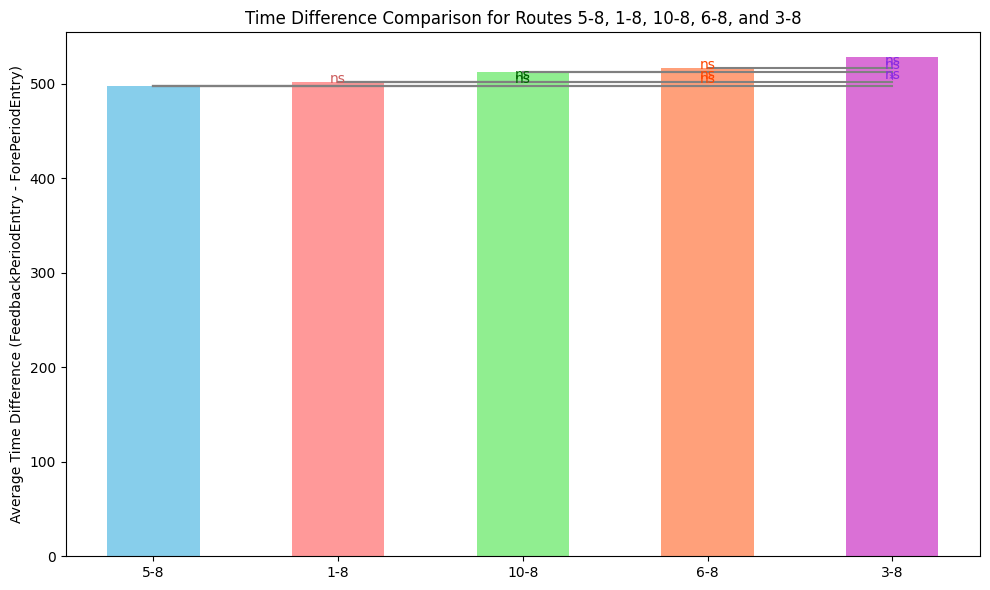

In [ ]:
group = filtered_sessions[filtered_sessions['Route'].isin(['5-8', '1-8', '10-8', '6-8', '3-8'])]

def calculate_time_diff(data, target_state):
    time_diffs = {'5-8': [], '1-8': [], '10-8': [], '6-8': [], '3-8': []}
    for (route, episode), episode_data in data.groupby(['Route', 'TotalEpisodeNum']):
        target_trials = episode_data[(episode_data['CurrentState'] == target_state)]
        if any(episode_data['Choice'] == 0):
            target_trials = target_trials.iloc[:1]
        for _, trial in target_trials.iterrows():
            fore_entry = trial['DelayperiodExit']
            feedback_entry = trial['FeedbackPeriodEntry']
            if feedback_entry > fore_entry:
                time_diff = feedback_entry - fore_entry
                time_diffs[route].append(time_diff)
    return time_diffs

time_diffs_group = calculate_time_diff(group, target_state=8)

p_values = {}
routes = ['5-8', '1-8', '10-8', '6-8', '3-8']

route_colors = ['#87CEEB', '#FF9999', '#90EE90', '#FFA07A', '#DA70D6']  # 浅色柱体
deep_colors = ['#4682B4', '#CD5C5C', '#006400', '#FF4500', '#8A2BE2']  # 深色符号

for i in range(len(routes)):
    for j in range(i + 1, len(routes)):
        route1, route2 = routes[i], routes[j]
        t_stat, p_val = ttest_ind(time_diffs_group[route1], time_diffs_group[route2], equal_var=False)
        p_values[(route1, route2)] = p_val

def significance_marker(p_val):
    if p_val < 0.001:
        return '****'
    elif p_val < 0.005:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

fig, ax = plt.subplots(figsize=(10, 6))
means = [np.mean(time_diffs_group[route]) for route in routes]
bars = ax.bar(routes, means, color=route_colors, width=0.5)  

for (route1, route2), p_val in p_values.items():
    x1, x2 = routes.index(route1), routes.index(route2)
    y1 = bars[x1].get_height()
    y2 = bars[x2].get_height()
    y = y1 + 0.05  
    
    ax.plot([x1, x1, x2, x2], [y, y + 0.02, y + 0.02, y], color='gray')  
    ax.text(x2, y + 0.04, significance_marker(p_val), ha='center', va='bottom', color=deep_colors[x2])

ax.set_title('Time Difference Comparison for Routes 5-8, 1-8, 10-8, 6-8, and 3-8')
ax.set_ylabel('Average Time Difference (FeedbackPeriodEntry - ForePeriodEntry)')
plt.tight_layout()
plt.show()

03/11/2024 Reaction time 

Roughly: feedbackentry - delayexit

precisely: using saccades data 

try regression: y-rt, xb-distance (2,4,6), state 3 or state 8
logistic regression: 

rt, distance (2,4,6) for each episode, distance for each trial (0,1,2,3,4,5,6), choice (0,1), repeat state


